# 第7章・第8章 ローレンツ曲線とジニ係数

所得分布の不平等度を測る代表的な指標である**ローレンツ曲線**と**ジニ係数**を、
具体例とシミュレーションを使って学びます。

**この章の目標**:
- ローレンツ曲線を描けるようになる
- ジニ係数の計算方法を理解し、Rで実装する
- 乗算モデルのシミュレーション結果にジニ係数を適用する

*このノートブックは Claude Opus 4.6 を利用して作成しました。*

---

## 7.1 ローレンツ曲線

4人の集団の所得ベクトル $\mathbf{y} = (100, 200, 300, 400)$ を例に考えます。

- 所得の合計: 1000、平均: 250
- **累積人口シェア** $\mathbf{p}$: 下位 $k$ 人が全体の何%か
- **累積所得シェア** $\boldsymbol{\phi}$: 下位 $k$ 人の所得が全体の何%か

$(\mathbf{p}, \boldsymbol{\phi})$ のグラフが**ローレンツ曲線**です。

In [7]:
# 所得ベクトル
y <- c(100, 200, 300, 400)

# 累積人口シェア（0を含む）
p <- c(0, 1:length(y) / length(y))
p

[1] 0.00 0.25 0.50 0.75 1.00

In [8]:
# 累積所得シェア（0を含む）
phi <- c(0, cumsum(y) / sum(y))
phi

[1] 0.0 0.1 0.3 0.6 1.0

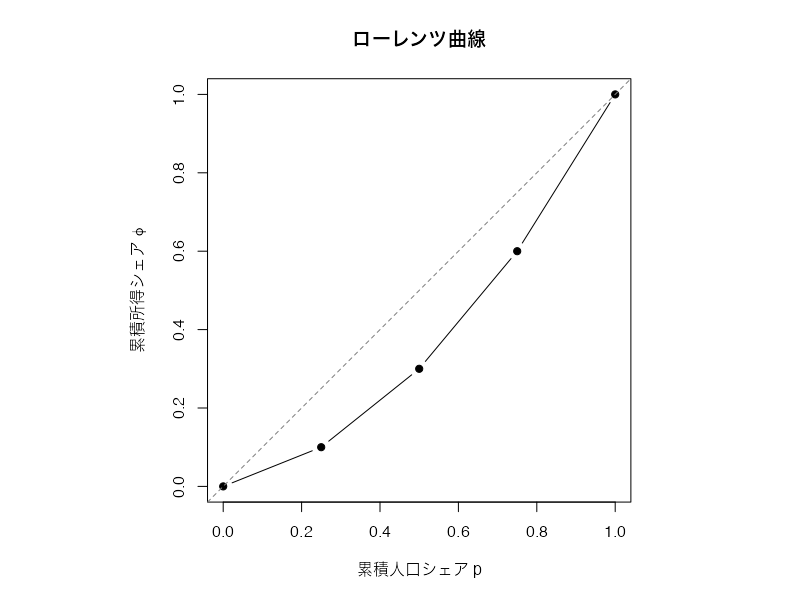

In [9]:
# ローレンツ曲線を描く
par(pty = "s")
plot(p, phi, type = "b", pch = 19,
     xlim = c(0, 1), ylim = c(0, 1), asp = 1,
     xlab = "累積人口シェア p",
     ylab = expression("累積所得シェア " * phi),
     main = "ローレンツ曲線")
# 完全平等線（対角線）
abline(0, 1, lty = 2, col = "gray50")

完全平等線（対角線）からローレンツ曲線が離れるほど、不平等が大きいことを意味します。

### ローレンツ曲線の比較

別の所得分配 $\mathbf{z} = (100, 200, 300, 1400)$ と比べてみましょう。

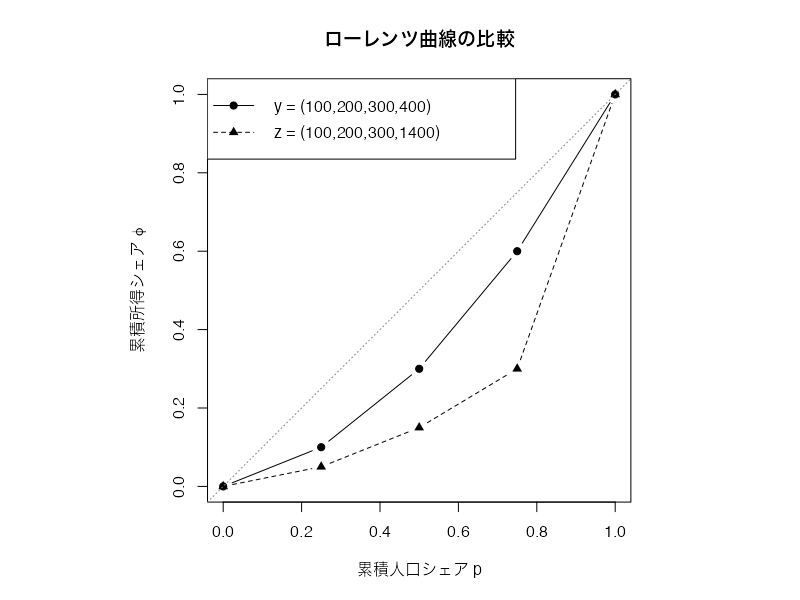

In [10]:
z <- c(100, 200, 300, 1400)
phi_z <- c(0, cumsum(z) / sum(z))

par(pty = "s")
plot(p, phi, type = "b", pch = 19,
     xlim = c(0, 1), ylim = c(0, 1), asp = 1,
     xlab = "累積人口シェア p",
     ylab = expression("累積所得シェア " * phi),
     main = "ローレンツ曲線の比較")
lines(p, phi_z, type = "b", pch = 17, lty = 2)
abline(0, 1, lty = 3, col = "gray50")
legend("topleft", legend = c("y = (100,200,300,400)", "z = (100,200,300,1400)"),
       pch = c(19, 17), lty = c(1, 2))

$\mathbf{z}$ の方が完全平等線から大きく離れており、より不平等であることがわかります。

---

## 7.2 ジニ係数

不平等度を1つの数値で表すために、完全平等線とローレンツ曲線の間の面積を使います。

$$G = 1 - 2L$$

ここで $L$ はローレンツ曲線の下の面積です。台形公式で計算できます。

In [ ]:
# ローレンツ曲線の下の面積 L を台形公式で計算
L <- sum(diff(p) * (phi[-length(phi)] + phi[-1])) / 2
L

In [17]:
# ジニ係数
G <- 1 - 2 * L
G

[1] 0.25

$\mathbf{y}$ のジニ係数は 0.25 です。

In [18]:
# z のジニ係数も同じ方法で計算
L_z <- sum(diff(p) * (phi_z[-length(phi_z)] + phi_z[-1])) / 2
G_z <- 1 - 2 * L_z
G_z

[1] 0.5

$\mathbf{z}$ のジニ係数は 0.5 で、$\mathbf{y}$ より大きく、ローレンツ曲線で見た直感と一致しています。

### ローレンツ曲線の下の面積を図示

ジニ係数の意味を視覚的に確認しましょう。

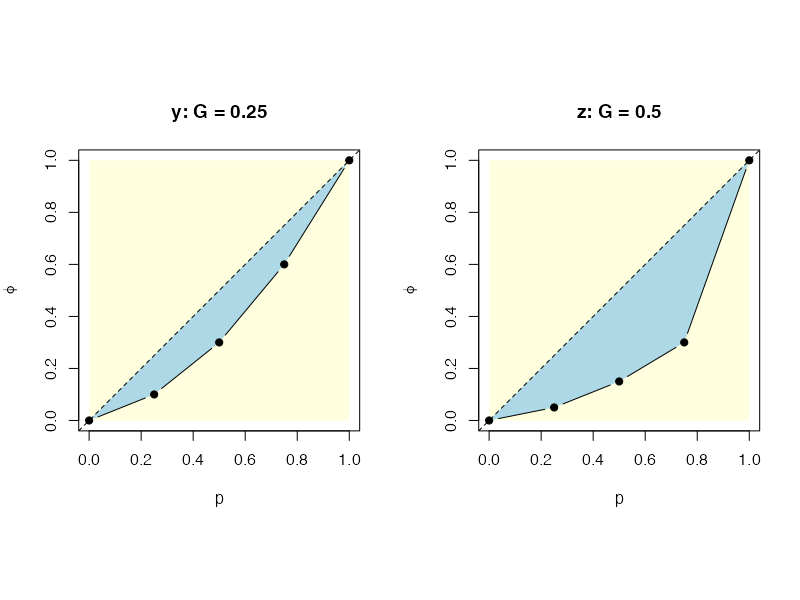

In [19]:
par(mfrow = c(1, 2), pty = "s")

# y のローレンツ曲線（面積を塗る）
plot(p, phi, type = "n",
     xlim = c(0, 1), ylim = c(0, 1), asp = 1,
     xlab = "p", ylab = expression(phi),
     main = paste0("y: G = ", G))
polygon(c(p, 1, 0), c(rep(0, length(p)), 1, 1),
        col = "lightyellow", border = NA)
polygon(p, phi, col = "lightblue", border = NA)
lines(p, phi, type = "b", pch = 19)
abline(0, 1, lty = 2)

# z のローレンツ曲線（面積を塗る）
plot(p, phi_z, type = "n",
     xlim = c(0, 1), ylim = c(0, 1), asp = 1,
     xlab = "p", ylab = expression(phi),
     main = paste0("z: G = ", G_z))
polygon(c(p, 1, 0), c(rep(0, length(p)), 1, 1),
        col = "lightyellow", border = NA)
polygon(p, phi_z, col = "lightblue", border = NA)
lines(p, phi_z, type = "b", pch = 19)
abline(0, 1, lty = 2)

par(mfrow = c(1, 1))

薄い黄色の部分が「完全平等線とローレンツ曲線の間」、水色が「ローレンツ曲線の下」です。
黄色の面積が大きいほど（＝水色が小さいほど）ジニ係数が大きくなります。

---

## 8.1 ジニ係数の一般的な計算式

講義ノート 式(8.9) より、昇順に並べた所得ベクトル $\mathbf{y} = (y_1, \ldots, y_n)$ のジニ係数は、

$$G = \frac{2}{n^2 \mu} \sum_{k=1}^{n} k \, y_k - \frac{n+1}{n}$$

で計算できます。これをR関数として実装します。

In [20]:
# ジニ係数の関数
Gini <- function(x) {
  n <- length(x)
  x <- sort(x)
  (2 * sum(x * 1:n) / sum(x) - (n + 1)) / n
}

In [21]:
# 検算
Gini(y)

[1] 0.25

In [22]:
Gini(z)

[1] 0.5

台形公式で手計算した結果と一致しています。

### ローレンツ曲線を描く関数

ローレンツ曲線の描画も関数にしておくと便利です。

In [23]:
# ローレンツ曲線を描く関数
Lorenz <- function(x, add = FALSE, ...) {
  x <- sort(x)
  n <- length(x)
  p   <- c(0, 1:n / n)
  phi <- c(0, cumsum(x) / sum(x))
  if (add) {
    lines(p, phi, ...)
  } else {
    par(pty = "s")
    plot(p, phi, type = "l",
         xlim = c(0, 1), ylim = c(0, 1), asp = 1,
         xlab = "累積人口シェア p",
         ylab = expression("累積所得シェア " * phi),
         ...)
    abline(0, 1, lty = 2, col = "gray50")
  }
}

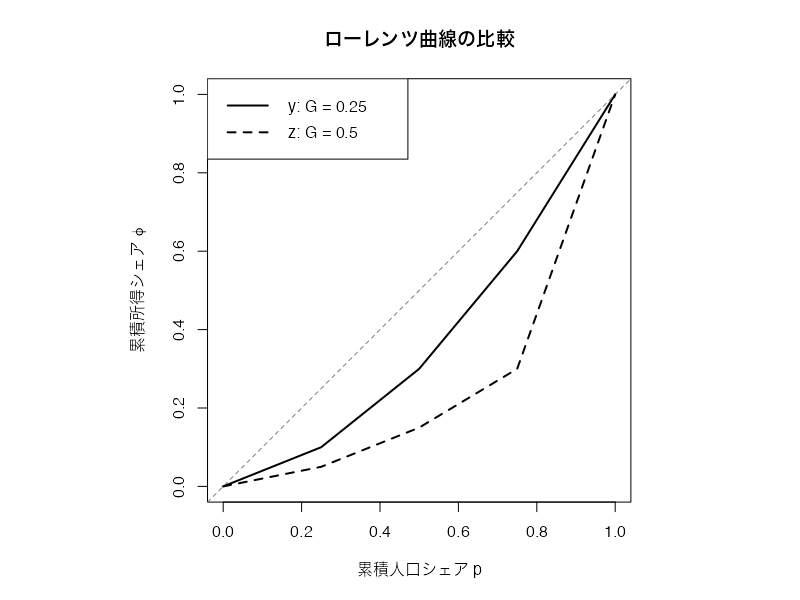

In [24]:
# 使ってみる
Lorenz(y, main = "ローレンツ曲線の比較", lwd = 2)
Lorenz(z, add = TRUE, lty = 2, lwd = 2)
legend("topleft",
       legend = c(paste0("y: G = ", Gini(y)),
                  paste0("z: G = ", Gini(z))),
       lty = c(1, 2), lwd = 2)

---

## 8.2 乗算モデルとジニ係数

第6章で学んだ乗算モデルのシミュレーション結果に対して、ローレンツ曲線を描き、
ジニ係数を計算してみましょう。

In [25]:
# 乗算モデルのシミュレーション（第6章の復習）
N <- 10000   # 人数
n <- 30      # 試行回数
p_win <- 0.7 # 勝つ確率
b <- 1.3     # 倍率

set.seed(8931)
W_all <- replicate(N, sum(sample(c(0, 1), size = n, replace = TRUE,
                                 prob = c(1 - p_win, p_win))))
Y_all <- b ^ W_all

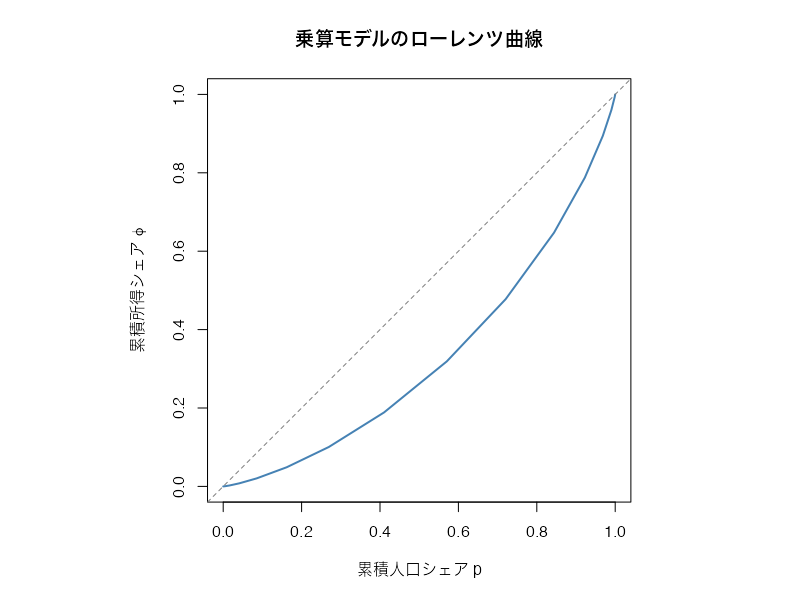

In [26]:
# ローレンツ曲線
Lorenz(Y_all, main = "乗算モデルのローレンツ曲線", lwd = 2, col = "steelblue")

In [27]:
# ジニ係数
Gini(Y_all)

[1] 0.3471486

### 倍率 $b$ とジニ係数の関係

講義ノートでは $\partial G / \partial b > 0$（倍率が大きいほど不平等度が増す）でした。
シミュレーションで確認してみましょう。

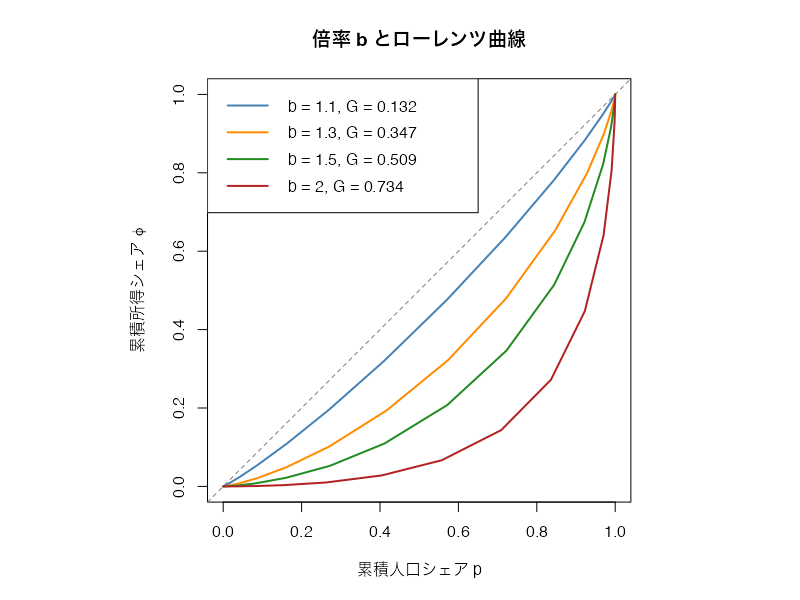

In [28]:
set.seed(8931)
b_vals <- c(1.1, 1.3, 1.5, 2.0)

# ローレンツ曲線を重ねて描画
par(pty = "s")
plot(0, 0, type = "n",
     xlim = c(0, 1), ylim = c(0, 1), asp = 1,
     xlab = "累積人口シェア p",
     ylab = expression("累積所得シェア " * phi),
     main = "倍率 b とローレンツ曲線")
abline(0, 1, lty = 2, col = "gray50")

cols <- c("steelblue", "darkorange", "forestgreen", "firebrick")
gini_vals <- numeric(length(b_vals))

for (j in seq_along(b_vals)) {
  W_sim <- replicate(N, sum(sample(c(0, 1), size = n, replace = TRUE,
                                   prob = c(1 - p_win, p_win))))
  Y_sim <- b_vals[j] ^ W_sim
  Lorenz(Y_sim, add = TRUE, lwd = 2, col = cols[j])
  gini_vals[j] <- Gini(Y_sim)
}

legend("topleft",
       legend = paste0("b = ", b_vals, ", G = ", round(gini_vals, 3)),
       col = cols, lwd = 2)

倍率 $b$ が大きくなるほどローレンツ曲線が完全平等線から離れ、ジニ係数が大きくなることが確認できます。

---

## まとめ

| 概念 | 内容 |
|------|------|
| ローレンツ曲線 | 累積人口シェア $p$ と累積所得シェア $\phi$ の対応を描いたグラフ |
| 完全平等線 | 全員が同じ所得のとき対角線 $\phi = p$ になる |
| ジニ係数 $G$ | 完全平等線とローレンツ曲線の間の面積の比、$G = 1 - 2L$ |
| 計算式 | $G = \frac{2}{n^2\mu}\sum_{k=1}^n k \, y_k - \frac{n+1}{n}$ |
| $G = 0$ | 完全平等 |
| $G = 1$ | 完全不平等（1人が全所得を独占） |
| 乗算モデル | 倍率 $b$ が大きいほどジニ係数が大きくなる |